In [1]:
import copy
import os
import torch
from torchsummary import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
#display_tree('./')

In [2]:
Total_dataset = pd.read_pickle("./pickle/trial.pkl")  
Total_dataset

Force_X   Force_Y   Force_Z  Torque_X  Torque_Y  Torque_Z  Input_P_1  \
0      0.000794 -0.205805  0.490874 -0.005637  0.000218 -0.000148        0.0   
1      0.000794 -0.205805  0.490874 -0.005637  0.000218 -0.000148        0.0   
2      0.000794 -0.205805  0.490874 -0.005637  0.000218 -0.000148        0.0   
3      0.000794 -0.205805  0.490874 -0.005637  0.000218 -0.000148        0.0   
4      0.000794 -0.205805  0.490874 -0.005637  0.000218 -0.000148        0.0   
...         ...       ...       ...       ...       ...       ...        ...   
20595  0.001068 -0.207219  0.503291 -0.005527  0.000286 -0.000279        0.0   
20596  0.001068 -0.207219  0.503291 -0.005527  0.000286 -0.000279        0.0   
20597  0.001068 -0.207219  0.503291 -0.005527  0.000286 -0.000279        0.0   
20598  0.001068 -0.207219  0.503291 -0.005527  0.000286 -0.000279        0.0   
20599  0.001068 -0.207219  0.503291 -0.005527  0.000286 -0.000279        0.0   

       Input_P_2   Flag  Sensor_P_1_1  ...  Sensor_P_3_2  Sensor_P_4_1  \
0            0.0  False    776.299988  ...    773.700012    747.299988   
1            0.0  False    776.299988  ...    773.700012    747.299988   
2            0.0  False    776.299988  ...    773.700012    747.299988   
3            0.0  False    776.299988  ...    773.700012    747.299988   
4            0.0  False    776.200012  ...    773.700012    747.299988   
...          ...    ...           ...  ...           ...           ...   
20595        0.0  False    673.200012  ...    774.200012    744.799988   
20596        0.0  False    673.200012  ...    774.200012    744.799988   
20597        0.0  False    673.200012  ...    774.200012    744.799988   
20598        0.0  False    673.200012  ...    774.200012    744.799988   
20599        0.0  False    673.200012  ...    774.200012    744.799988   

       Sensor_P_4_2  Sensor_P_5_1  Sensor_P_5_2  Sensor_P_6_1  Sensor_P_6_2  \
0        777.799988   1036.500000   1045.699951    527.400024    798.799988   
1        777.799988   1036.500000   1045.699951    527.400024    798.799988   
2        777.799988   1036.500000   1045.699951    527.400024    798.799988   
3        777.799988   1036.500000   1045.699951    527.400024    798.799988   
4        777.799988   1036.500000   1045.699951    527.400024    798.799988   
...             ...           ...           ...           ...           ...   
20595    774.299988   1034.199951   1041.600098    523.000000    797.799988   
20596    774.299988   1034.199951   1041.600098    523.000000    797.799988   
20597    774.299988   1034.199951   1041.600098    523.099976    798.500000   
20598    774.299988   1034.199951   1041.600098    523.099976    798.500000   
20599    774.299988   1034.199951   1041.600098    523.099976    798.500000   

          Sensor_S   Par1  Par2  
0      6694.399902  first     0  
1      6691.500000  first     0  
2      6691.500000  first     0  
3      6691.500000  first     0  
4      6691.500000  first     0  
...            ...    ...   ...  
20595  6678.199707  first     0  
20596  6678.199707  first     0  
20597  6678.199707  first     0  
20598  6678.199707  first     0  
20599  6678.199707  first     0  

[20600 rows x 24 columns]

<Axes: >

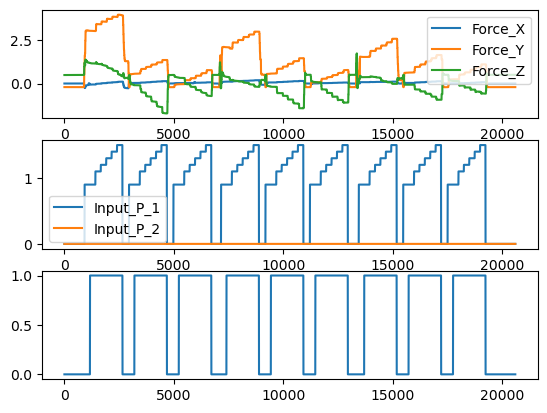

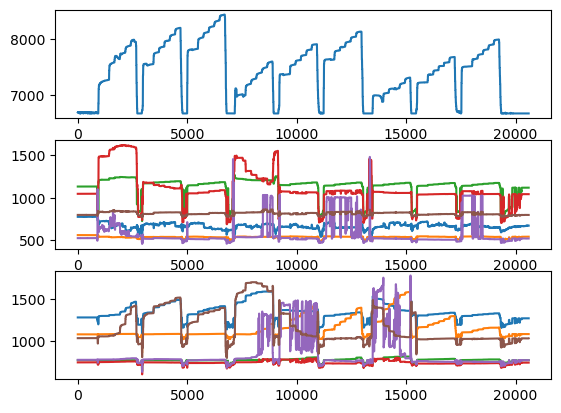

In [3]:
Fol_col=Total_dataset.columns[:3]
Input_P_col=Total_dataset.columns[6:8]
Flag_col=Total_dataset.columns[8]
#P_Sensor_col=Total_dataset.columns[9:21]
U_P_Sensor_col=['Sensor_P_1_1', 'Sensor_P_1_2',
                'Sensor_P_2_1',
                'Sensor_P_5_2',
                'Sensor_P_6_1', 'Sensor_P_6_2']

L_P_Sensor_col=['Sensor_P_2_2',
                'Sensor_P_3_1', 'Sensor_P_3_2',
                'Sensor_P_4_1', 'Sensor_P_4_2',
                'Sensor_P_5_1', ]
S_Sensor_col=Total_dataset.columns[21]


fig, axes = plt.subplots(nrows=3, ncols=1)
Total_dataset[Fol_col].plot(ax=axes[0])
Total_dataset[Input_P_col].plot(ax=axes[1])
Total_dataset[Flag_col].replace({True: 1, False: 0}).plot(ax=axes[2])
fig, axes = plt.subplots(nrows=3, ncols=1)
Total_dataset[S_Sensor_col].plot(ax=axes[0])

Total_dataset[U_P_Sensor_col].plot(ax=axes[1],legend=None)


Total_dataset[L_P_Sensor_col].plot(ax=axes[2],legend=None)




In [4]:
Filtered_dataset=Total_dataset.query('Flag==True')
Filtered_dataset

Force_X   Force_Y   Force_Z  Torque_X  Torque_Y  Torque_Z  Input_P_1  \
1167  -0.063664  3.048691  1.187733 -0.172625 -0.004700  0.016825        0.9   
1168  -0.063664  3.048691  1.187733 -0.172625 -0.004700  0.016825        0.9   
1169  -0.063664  3.048691  1.187733 -0.172625 -0.004700  0.016825        0.9   
1170  -0.063664  3.048691  1.187733 -0.172625 -0.004700  0.016825        0.9   
1171  -0.063664  3.048691  1.187733 -0.172625 -0.004700  0.016825        0.9   
...         ...       ...       ...       ...       ...       ...        ...   
19232  0.077320  1.105598 -0.584631 -0.121753  0.010542  0.003864        1.5   
19233  0.077320  1.105598 -0.584631 -0.121753  0.010542  0.003864        1.5   
19234  0.077320  1.105598 -0.584631 -0.121753  0.010542  0.003864        1.5   
19235  0.077320  1.105598 -0.584631 -0.121753  0.010542  0.003864        0.0   
19236  0.077320  1.105598 -0.584631 -0.121753  0.010542  0.003864        0.0   

       Input_P_2  Flag  Sensor_P_1_1  ...  Sensor_P_3_2  Sensor_P_4_1  \
1167         0.0  True    727.200012  ...    773.599976    751.299988   
1168         0.0  True    727.200012  ...    773.599976    751.299988   
1169         0.0  True    727.200012  ...    773.599976    751.299988   
1170         0.0  True    727.200012  ...    773.599976    751.299988   
1171         0.0  True    727.200012  ...    773.599976    751.299988   
...          ...   ...           ...  ...           ...           ...   
19232        0.0  True    649.400024  ...    783.099976    738.700012   
19233        0.0  True    649.400024  ...    783.099976    738.700012   
19234        0.0  True    649.400024  ...    783.099976    738.700012   
19235        0.0  True    656.099976  ...    783.099976    738.700012   
19236        0.0  True    656.099976  ...    783.099976    738.700012   

       Sensor_P_4_2  Sensor_P_5_1  Sensor_P_5_2  Sensor_P_6_1  Sensor_P_6_2  \
1167     780.799988   1057.400024   1482.000000    623.099976    832.100037   
1168     780.600037   1057.199951   1482.199951    662.099976    832.100037   
1169     780.600037   1057.199951   1482.199951    662.099976    832.100037   
1170     780.600037   1057.199951   1482.199951    662.099976    832.400024   
1171     780.600037   1057.199951   1482.199951    662.099976    832.400024   
...             ...           ...           ...           ...           ...   
19232    753.900024   1032.199951   1043.400024    514.400024    806.599976   
19233    753.900024   1032.199951   1043.400024    514.400024    806.599976   
19234    753.900024   1032.199951   1043.400024    514.400024    806.599976   
19235    753.900024   1032.199951   1043.400024    514.400024    806.599976   
19236    753.900024   1032.199951   1043.400024    514.400024    806.599976   

          Sensor_S   Par1  Par2  
1167   7250.000000  first     0  
1168   7250.000000  first     0  
1169   7250.000000  first     0  
1170   7250.000000  first     0  
1171   7250.000000  first     0  
...            ...    ...   ...  
19232  7992.299805  first     0  
19233  7991.799805  first     0  
19234  7991.799805  first     0  
19235  7991.799805  first     0  
19236  7991.799805  first     0  

[13357 rows x 24 columns]

<Axes: >

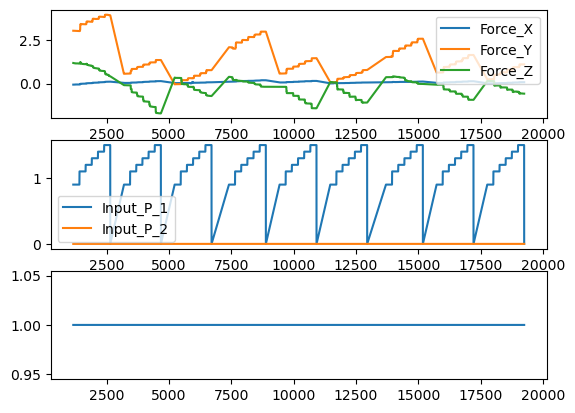

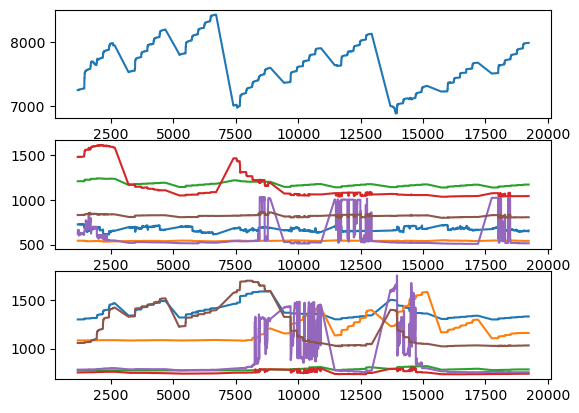

In [5]:
Fol_col=Filtered_dataset.columns[:3]
Input_P_col=Filtered_dataset.columns[6:8]
Flag_col=Filtered_dataset.columns[8]
#P_Sensor_col=Total_dataset.columns[9:21]
U_P_Sensor_col=['Sensor_P_1_1', 'Sensor_P_1_2',
                'Sensor_P_2_1',
                'Sensor_P_5_2',
                'Sensor_P_6_1', 'Sensor_P_6_2']

L_P_Sensor_col=['Sensor_P_2_2',
                'Sensor_P_3_1', 'Sensor_P_3_2',
                'Sensor_P_4_1', 'Sensor_P_4_2',
                'Sensor_P_5_1', ]
S_Sensor_col=Filtered_dataset.columns[21]


fig, axes = plt.subplots(nrows=3, ncols=1)
Filtered_dataset[Fol_col].plot(ax=axes[0])
Filtered_dataset[Input_P_col].plot(ax=axes[1])
Filtered_dataset[Flag_col].replace({True: 1, False: 0}).plot(ax=axes[2])
fig, axes = plt.subplots(nrows=3, ncols=1)
Filtered_dataset[S_Sensor_col].plot(ax=axes[0])

Filtered_dataset[U_P_Sensor_col].plot(ax=axes[1],legend=None)


Filtered_dataset[L_P_Sensor_col].plot(ax=axes[2],legend=None)


## Learning procss

In [12]:
Combi_df =Filtered_dataset 


# Setup hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
#!nvidia-smi

# Hot encoding needed
# Scailing!
# Validation dataset?

Y=np.array(Combi_df.filter(items=Filtered_dataset.columns[:3]))
X=np.array(Combi_df.filter(items=Filtered_dataset.columns[6:22]))

# Scaler
X_scaler = sklearn.preprocessing.MinMaxScaler()
Y_scaler = sklearn.preprocessing.MinMaxScaler()

X=torch.FloatTensor(X_scaler.fit_transform(X))
Y=torch.FloatTensor(Y_scaler.fit_transform(Y))



X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2 # 20% test, 80% train
                                                    #,shuffle=False#,random_state=42
                                                   ) # make the random split reproducible


train_dataset=DataLoader(utils.Data(X_train,Y_train),batch_size=BATCH_SIZE)
test_dataset=DataLoader(utils.Data(X_test,Y_test),batch_size=BATCH_SIZE)
Input_dim=len(X_train[0])
Output_dim=len(Y_train[0])





train_features, train_labels = next(iter(train_dataset))
print(f'{"Input feature: ":>20}{Input_dim}{"||":^22}{"Output feature: ":>20}{Output_dim}')
print(f'Input Train: {len(X_train)},Test: {len(X_test)}     ||   Output Train: {len(Y_train)}, Test: {len(Y_test)}')

print(f"Input  :: [batch] X [Sequnetial] X [feature] -----> {train_features.size()}")
print(f"Output :: [batch]                X [feature] -----> {train_labels.size()}")

     Input feature: 16          ||              Output feature: 3
Input Train: 10685,Test: 2672     ||   Output Train: 10685, Test: 2672
Input  :: [batch] X [Sequnetial] X [feature] -----> torch.Size([32, 1, 16])
Output :: [batch]                X [feature] -----> torch.Size([32, 3])


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1043 | test_loss: 0.0496 | 
Epoch: 2 | train_loss: 0.0512 | test_loss: 0.0480 | 
Epoch: 3 | train_loss: 0.0475 | test_loss: 0.0451 | 
Epoch: 4 | train_loss: 0.0452 | test_loss: 0.0427 | 
Epoch: 5 | train_loss: 0.0436 | test_loss: 0.0407 | 
Total training time: 9.220 seconds


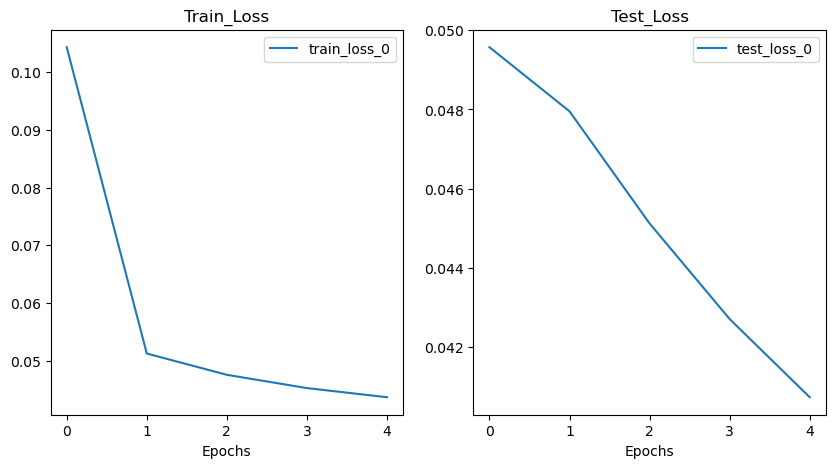

In [42]:
# Model

model = model_builder.LSTMModel(
    input_dim = Input_dim,
    hidden_dim=HIDDEN_UNITS,
    layer_dim=2,
    output_dim=Output_dim,
    dropout_prob=0.7)
# Set loss and optimizer
loss_fn = torch.nn.MSELoss() ## change
optimizer = torch.optim.Adam(model.parameters(), ## change
                             lr=LEARNING_RATE)
# Train
#torchinfo.summary(model,(5,5,5))
start_time = timer()
results=engine.train(model=model,
             train_dataloader=train_dataset,
             test_dataloader=test_dataset,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")
utils.plot_loss_curves([results])

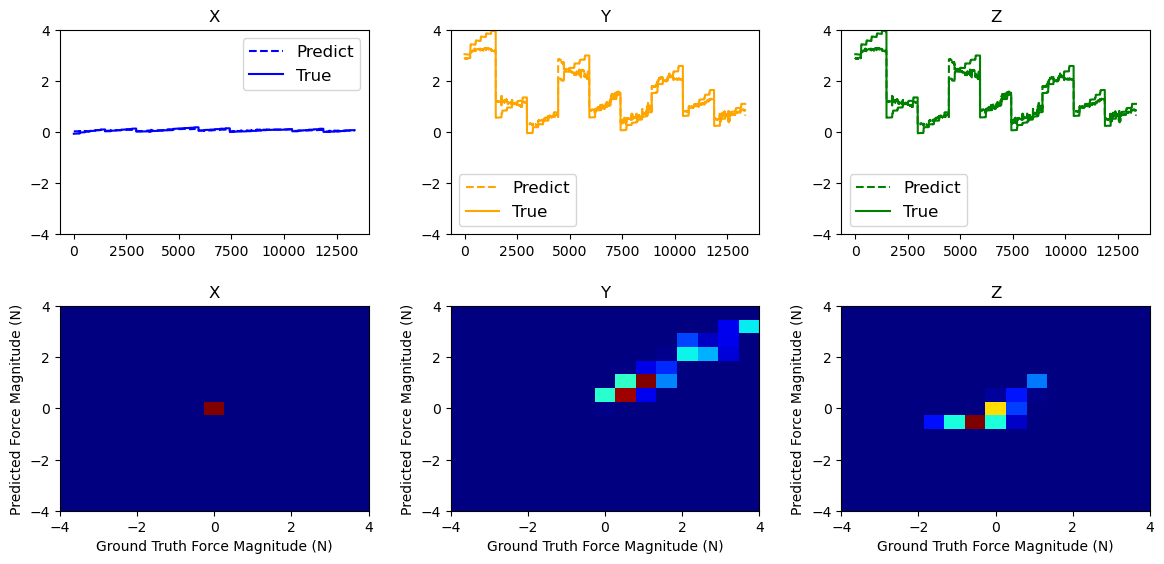

In [14]:
Pred_Values=Y_scaler.inverse_transform(utils.predict(model,DataLoader(utils.Data(X,Y),batch_size=BATCH_SIZE)))
True_Values=Y_scaler.inverse_transform(Y)
utils.plot_prediction(Pred_Values,True_Values)

## Different Input feature combination
1. Only input pressure
2. Input pressure + TCP
3. Only Pressure
4. Only Strain
5. Pressure sensor + input pressure
6. Strain sensor + Input pressure
7. Pressure + Strain
8. Pressure + Strain + Input pressure
9. Pressure + Strain + Input Pressure + TCP
10. Pressure + Strain + Input Pressure + Object knowledge
11. Pressure(1/2) + Strain + Input Pressure


In [33]:
con1=Filtered_dataset.columns[6:8] # input pressure
#con2=Filtered_dataset.columns[6:8]
con3=Filtered_dataset.columns[9:21] # Only pressure sensor
con4=Filtered_dataset.columns[21] # only Strain Sensor
con5=Filtered_dataset.columns[9:22] # all Sensor
con6=Filtered_dataset.columns[6:22] # all Sensor + Given pressure
con7=Filtered_dataset.columns[6:21] # input pressure + pressure
con8=Filtered_dataset.columns[6:8].append(pd.Index([Filtered_dataset.columns[21]])) # input pressure + Strain sensor




In [54]:
con1

Index(['Input_P_1', 'Input_P_2'], dtype='object')

Input combination is Index(['Input_P_1', 'Input_P_2'], dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1365 | test_loss: 0.0491 | 
Epoch: 2 | train_loss: 0.0541 | test_loss: 0.0490 | 
Epoch: 3 | train_loss: 0.0514 | test_loss: 0.0490 | 
Epoch: 4 | train_loss: 0.0509 | test_loss: 0.0490 | 
Epoch: 5 | train_loss: 0.0507 | test_loss: 0.0489 | 


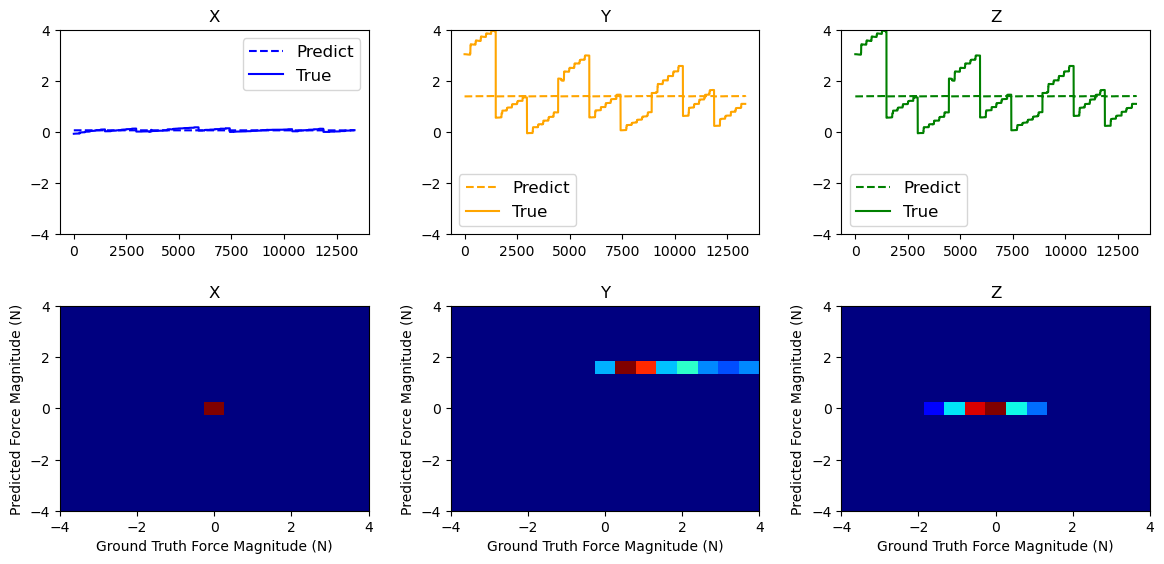

Input combination is Index(['Sensor_P_1_1', 'Sensor_P_1_2', 'Sensor_P_2_1', 'Sensor_P_2_2',
       'Sensor_P_3_1', 'Sensor_P_3_2', 'Sensor_P_4_1', 'Sensor_P_4_2',
       'Sensor_P_5_1', 'Sensor_P_5_2', 'Sensor_P_6_1', 'Sensor_P_6_2'],
      dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1225 | test_loss: 0.0440 | 
Epoch: 2 | train_loss: 0.0456 | test_loss: 0.0361 | 
Epoch: 3 | train_loss: 0.0360 | test_loss: 0.0281 | 
Epoch: 4 | train_loss: 0.0292 | test_loss: 0.0218 | 
Epoch: 5 | train_loss: 0.0248 | test_loss: 0.0161 | 


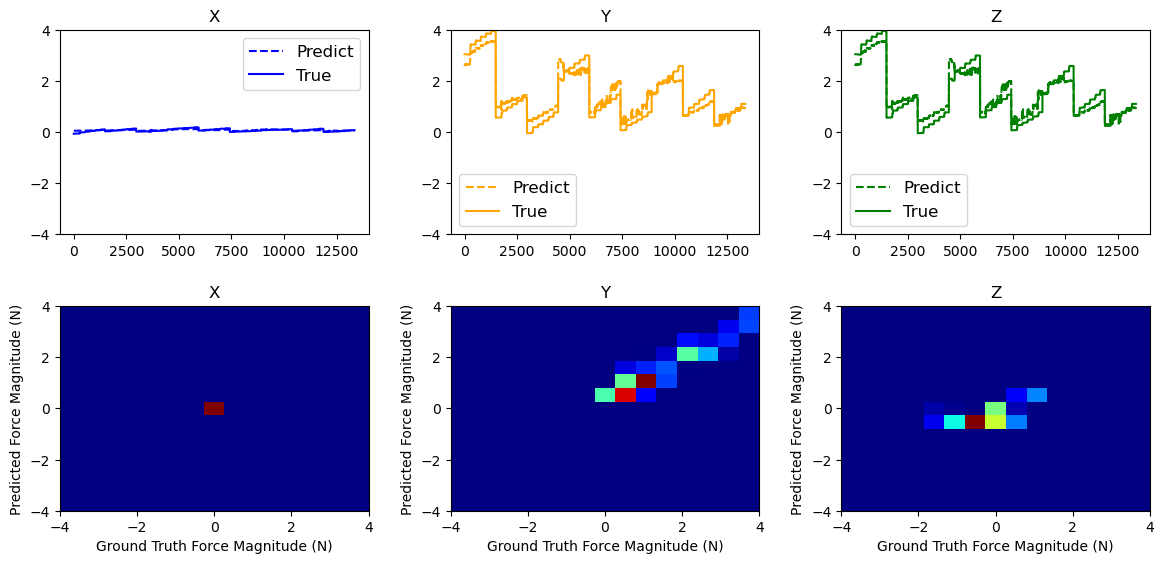

Input combination is Index(['Sensor_P_1_1', 'Sensor_P_1_2', 'Sensor_P_2_1', 'Sensor_P_2_2',
       'Sensor_P_3_1', 'Sensor_P_3_2', 'Sensor_P_4_1', 'Sensor_P_4_2',
       'Sensor_P_5_1', 'Sensor_P_5_2', 'Sensor_P_6_1', 'Sensor_P_6_2',
       'Sensor_S'],
      dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0889 | test_loss: 0.0332 | 
Epoch: 2 | train_loss: 0.0328 | test_loss: 0.0196 | 
Epoch: 3 | train_loss: 0.0248 | test_loss: 0.0141 | 
Epoch: 4 | train_loss: 0.0221 | test_loss: 0.0121 | 
Epoch: 5 | train_loss: 0.0205 | test_loss: 0.0108 | 


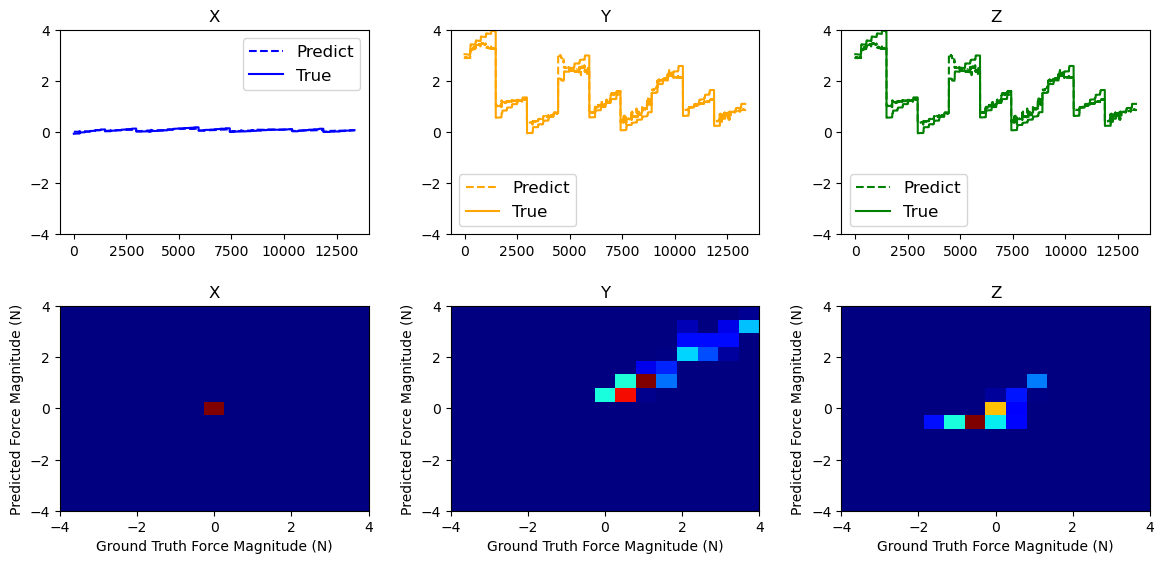

Input combination is Index(['Input_P_1', 'Input_P_2', 'Flag', 'Sensor_P_1_1', 'Sensor_P_1_2',
       'Sensor_P_2_1', 'Sensor_P_2_2', 'Sensor_P_3_1', 'Sensor_P_3_2',
       'Sensor_P_4_1', 'Sensor_P_4_2', 'Sensor_P_5_1', 'Sensor_P_5_2',
       'Sensor_P_6_1', 'Sensor_P_6_2', 'Sensor_S'],
      dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1216 | test_loss: 0.0348 | 
Epoch: 2 | train_loss: 0.0361 | test_loss: 0.0236 | 
Epoch: 3 | train_loss: 0.0288 | test_loss: 0.0217 | 
Epoch: 4 | train_loss: 0.0261 | test_loss: 0.0173 | 
Epoch: 5 | train_loss: 0.0225 | test_loss: 0.0123 | 


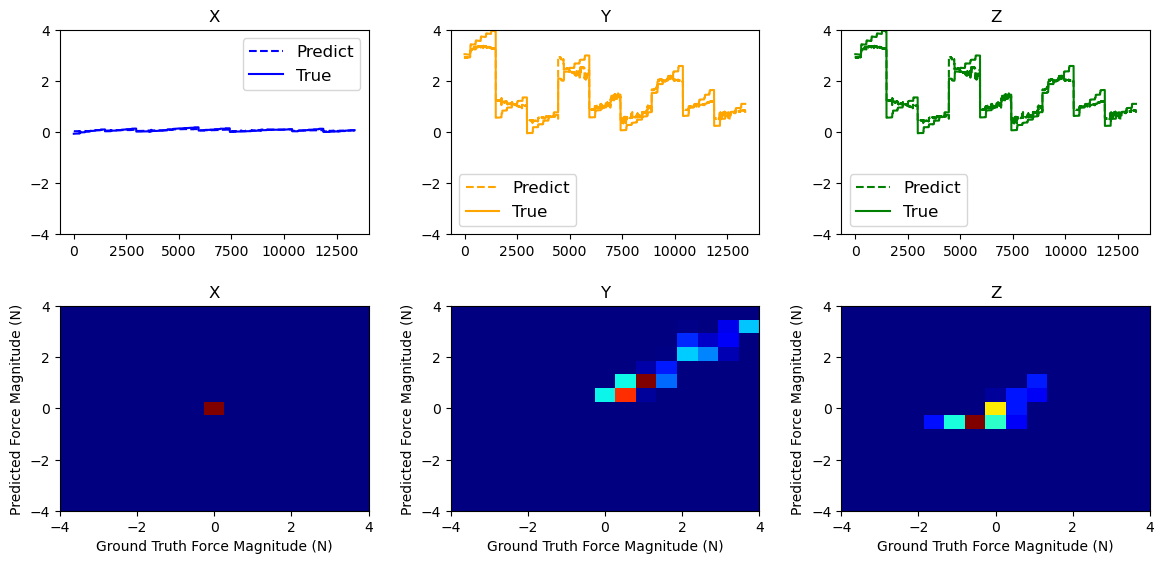

Input combination is Index(['Input_P_1', 'Input_P_2', 'Flag', 'Sensor_P_1_1', 'Sensor_P_1_2',
       'Sensor_P_2_1', 'Sensor_P_2_2', 'Sensor_P_3_1', 'Sensor_P_3_2',
       'Sensor_P_4_1', 'Sensor_P_4_2', 'Sensor_P_5_1', 'Sensor_P_5_2',
       'Sensor_P_6_1', 'Sensor_P_6_2'],
      dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0599 | test_loss: 0.0366 | 
Epoch: 2 | train_loss: 0.0302 | test_loss: 0.0188 | 
Epoch: 3 | train_loss: 0.0241 | test_loss: 0.0145 | 
Epoch: 4 | train_loss: 0.0214 | test_loss: 0.0128 | 
Epoch: 5 | train_loss: 0.0196 | test_loss: 0.0111 | 


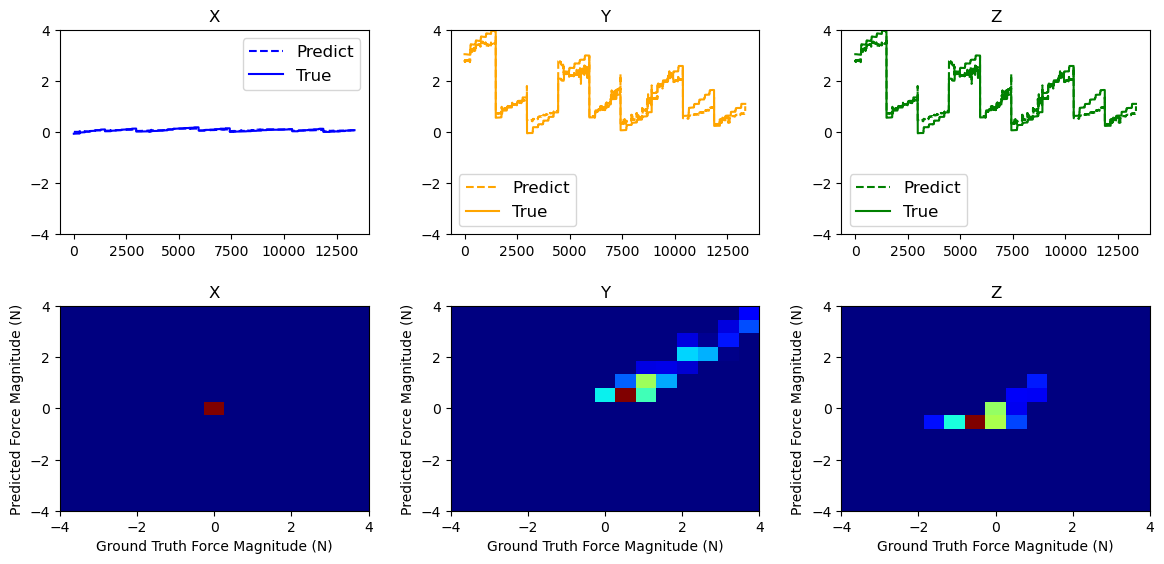

Input combination is Index(['Input_P_1', 'Input_P_2', 'Sensor_S'], dtype='object')


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0963 | test_loss: 0.0500 | 
Epoch: 2 | train_loss: 0.0520 | test_loss: 0.0493 | 
Epoch: 3 | train_loss: 0.0498 | test_loss: 0.0484 | 
Epoch: 4 | train_loss: 0.0480 | test_loss: 0.0457 | 
Epoch: 5 | train_loss: 0.0459 | test_loss: 0.0429 | 


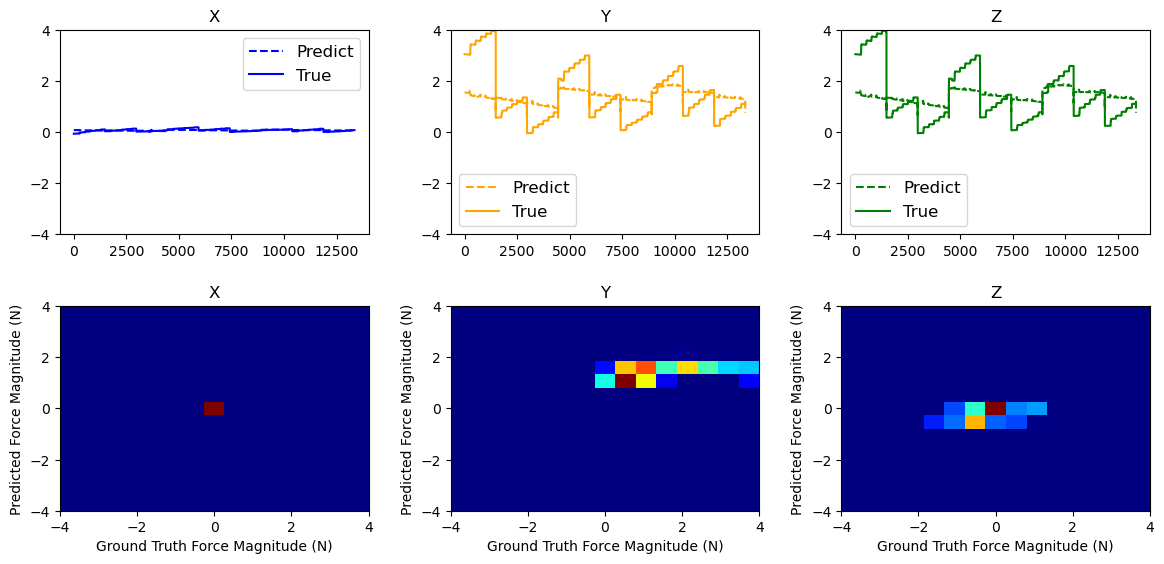

In [53]:
Compare_input_feature=[con1, con3,con5,con6,con7,con8]
duration_time=[]
loss_results=[]

for i in range(len(Compare_input_feature)):
    ### Data Prepare
    print(f'Input combination is {Compare_input_feature[i]}')
    Y=np.array(Combi_df.filter(items=Filtered_dataset.columns[:3]))
    X=np.array(Combi_df.filter(items=Compare_input_feature[i])) ## important part

    
    X_scaler = sklearn.preprocessing.MinMaxScaler()
    Y_scaler = sklearn.preprocessing.MinMaxScaler()

    X=torch.FloatTensor(X_scaler.fit_transform(X))
    Y=torch.FloatTensor(Y_scaler.fit_transform(Y))



    X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                        Y, 
                                                        test_size=0.2 # 20% test, 80% train
                                                        #,shuffle=False#,random_state=42
                                                       ) # make the random split reproducible
    train_dataset=DataLoader(utils.Data(X_train,Y_train),batch_size=BATCH_SIZE)
    test_dataset=DataLoader(utils.Data(X_test,Y_test),batch_size=BATCH_SIZE)
    Input_dim=len(X_train[0])
    Output_dim=len(Y_train[0])
    
    
    ## Build
    model = model_builder.LSTMModel(
    input_dim = Input_dim,
    hidden_dim=HIDDEN_UNITS,
    layer_dim=2,
    output_dim=Output_dim,
    dropout_prob=0.7)
    # Set loss and optimizer
    loss_fn = torch.nn.MSELoss() ## change
    optimizer = torch.optim.Adam(model.parameters(), ## change
                                 lr=LEARNING_RATE)
    # Train
    #torchinfo.summary(model,(5,5,5))
    start_time = timer()
    results=engine.train(model=model,
                 train_dataloader=train_dataset,
                 test_dataloader=test_dataset,
                 loss_fn=loss_fn,
                 optimizer=optimizer,
                 epochs=NUM_EPOCHS,
                 device=device)
    end_time = timer()
    
    duration_time.append(end_time-start_time)
    loss_results.append(results)
    Pred_Values=Y_scaler.inverse_transform(utils.predict(model,DataLoader(utils.Data(X,Y),batch_size=BATCH_SIZE)))
    True_Values=Y_scaler.inverse_transform(Y)
    utils.plot_prediction(Pred_Values,True_Values)
    '''utils.save_model(model=model,
                     target_dir="models",
                     model_name="combination"+str(i)+".pth")'''
    

Text(0, 0.5, 'Time taken [s]')

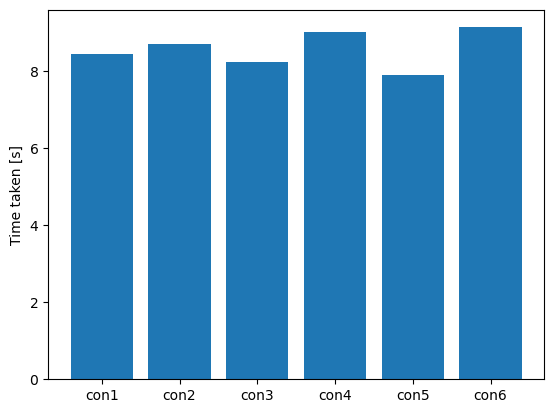

In [49]:
xx=['con1','con2','con3','con4','con5','con6']
plt.bar(xx,duration_time)
plt.ylabel('Time taken [s]')

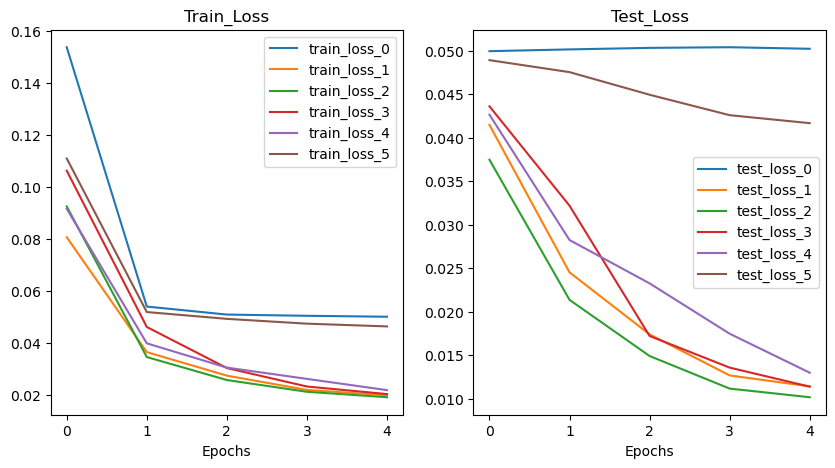

In [51]:
utils.plot_loss_curves(loss_results)

In [ ]:
for i in range(len(Compare_input_feature)):
    model_name="combination"+str(i)+".pth"
    model = torch.load(PATH)
    model.eval()
    Pred_Values=Y_scaler.inverse_transform(utils.predict(model,DataLoader(utils.Data(X,Y),batch_size=BATCH_SIZE)))
    True_Values=Y_scaler.inverse_transform(Y)
    utils.plot_prediction(Pred_Values,True_Values)

## Save Model

In [ ]:
'''
utils.save_model(model=model,
                 target_dir="models",
                 model_name="1st_trial.pth")
                 '''
model = torch.load(PATH)
model.eval()
